In [ ]:
!pip install pycaret
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 7.6 MB/s 
     |████████████████████████████████| 167 kB 46.0 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 1.3 MB 35.2 MB/s 
     |████████████████████████████████| 120 kB 48.0 MB/s 
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.7 MB 37.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.8 MB 715 kB/s 
     |████████████████████████████████| 262 kB 45.2 MB/s 
     |████████████████████████████████| 6.8 MB 43.4 MB/s 
     |████████████████████████████████| 2.0 MB 40.5 MB/s 
     |████████████████████████████████| 1.3 MB 42.5 MB/s 
     |████████████████████████████████| 6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pycaret.utils import enable_colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult_df.csv to adult_df.csv


In [ ]:
import pandas as pd
df = pd.read_csv('adult_df.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,incomes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from pycaret.classification import *

exp_reg101 = setup(data = df, target = "incomes", silent=True)

,Description,Value
0,session_id,827
1,Target,incomes
2,Target Type,Binary
3,Label Encoded,"<=50K: 0, >50K: 1"
4,Original Data,"(32561, 15)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8705,0.9287,0.6614,0.7744,0.7133,0.6304,0.6338,0.362
gbc,Gradient Boosting Classifier,0.8641,0.9196,0.5927,0.7977,0.6798,0.5959,0.6067,3.913
ada,Ada Boost Classifier,0.8586,0.9151,0.6236,0.7539,0.6824,0.5925,0.5971,1.069
rf,Random Forest Classifier,0.8535,0.9050,0.6211,0.7366,0.6737,0.5802,0.5838,2.729
lda,Linear Discriminant Analysis,0.8399,0.8934,0.5673,0.7164,0.6329,0.5323,0.5384,0.542
ridge,Ridge Classifier,0.8385,0.0000,0.5123,0.7452,0.6070,0.5098,0.5241,0.055
et,Extra Trees Classifier,0.8353,0.8813,0.6096,0.6812,0.6433,0.5367,0.5382,3.274
dt,Decision Tree Classifier,0.8117,0.7456,0.6166,0.6128,0.6147,0.4901,0.4901,0.224
lr,Logistic Regression,0.7987,0.6069,0.2881,0.7155,0.4072,0.3130,0.3613,1.059
nb,Naive Bayes,0.7912,0.8060,0.3155,0.6467,0.4240,0.3145,0.3448,0.044


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=827, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7912,0.8057,0.3237,0.6429,0.4306,0.3195,0.3477
1,0.7996,0.8181,0.3327,0.6827,0.4474,0.3423,0.3753
2,0.7898,0.7942,0.3201,0.6380,0.4263,0.3146,0.3427
3,0.7824,0.7971,0.2919,0.6113,0.3951,0.2821,0.3108
4,0.7907,0.7983,0.2991,0.6535,0.4104,0.3039,0.3383
5,0.8034,0.8077,0.3315,0.7050,0.4510,0.3497,0.3866
6,0.7867,0.8139,0.3063,0.6273,0.4116,0.2997,0.3285
7,0.7850,0.8138,0.2973,0.6226,0.4024,0.2908,0.3204
8,0.7925,0.8087,0.3261,0.6464,0.4335,0.3230,0.3513


In [ ]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7921,0.7481,0.3237,0.6475,0.4317,0.3213,0.3503
1,0.7996,0.7383,0.3327,0.6827,0.4474,0.3423,0.3753
2,0.7889,0.7134,0.3201,0.6335,0.4253,0.3127,0.3401
3,0.7828,0.7034,0.2919,0.6136,0.3956,0.2830,0.3121
4,0.7916,0.7228,0.2991,0.6587,0.4114,0.3058,0.3411
5,0.8034,0.6900,0.3315,0.7050,0.4510,0.3497,0.3866
6,0.7872,0.7173,0.3063,0.6296,0.4121,0.3006,0.3298
7,0.7859,0.7406,0.2973,0.6274,0.4034,0.2927,0.3230
8,0.7929,0.7226,0.3261,0.6487,0.4341,0.3239,0.3526


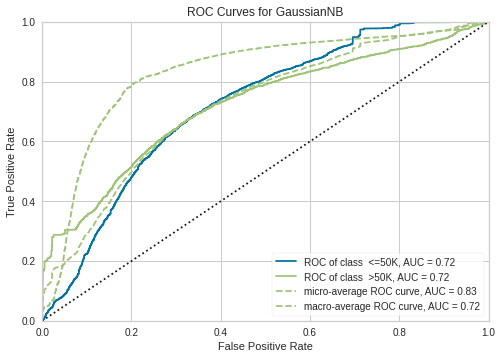

In [ ]:
plot_model(tuned_nb, plot ='auc')